# <ins>**Comparing McKinsey and BCG's U.S. Federal Government Contracts**<ins>  
### - Will Karpie

# **Outline**
1. Introduction
2.   The USASpending API
3.   Data Formatting
4.   Plotting and Analysis

# **1. Introduction**

## Summary
### This script uses the USASpending API to retrieve contract award data for McKinsey and BCG, combines them and generates reports on their federal contracts.

## Importing Libraries

In [1]:
import requests
import pandas as pd
import datetime as dt
from datetime import date
from datetime import datetime
import json
import pprint
import time
import numpy as np  
import matplotlib.pyplot as plt 

## Formatting

In [2]:
pd.options.display.float_format = '{:.0f}'.format

# **2. The USA Spending API**

### The [USASpending.gov](USASpending.gov) API has over 163 endpoints listed in their [documentation index](https://api.usaspending.gov/docs/), the [API documentation](https://github.com/fedspendingtransparency/usaspending-api) can help explain how each endpoint works.
### As of 2022 Unique Entity Identifiers (UEIs) are used to identify government contractors. However, firms can be associated with multiple UEIs often representing different parts of their internal structures. McKinsey has two names and two UEIs in USASpending; and BCG has three names and three UEIs. Using the correct UEI is important to avoid double counting values. 

## <ins>Using the UEIs for for McKinsey and BCG<ins>

### There are three UEIs that capture all activity for McKinsey and BCG. McKinsey has a "parent" UEI that captures all of its contracts. BCG has two, the first UEI represents the whole BCG organization, the second represents the internal BCG federal contracting group. Below are summary requests for those UEIs.

In [3]:
#Making variables for the McKinsey and BCG UEIs
mck_uei = 'UX5BCLDQKKM8'
bcg_uei = 'G2F1JNM6HCL4'
bcg_fed_uei = 'EFNQK7LCF373'

In [4]:
#Making a request to see recipient summary profile for McKinsey

url = 'https://api.usaspending.gov/api/v2/recipient/'
type = {
      "order": "desc",
      "sort": "amount",
      "page": 1,
      "limit": 50,
      "award_type": "all",
      "keyword": mck_uei}
mck_response = requests.post(url,json=type).json()
mck_response['results']

[{'id': '81832a62-a7a7-a534-3918-df4583684796-P',
  'duns': '001673920',
  'uei': 'UX5BCLDQKKM8',
  'name': 'MCKINSEY & COMPANY, INC.',
  'recipient_level': 'P',
  'amount': 65544643.97},
 {'id': '81832a62-a7a7-a534-3918-df4583684796-C',
  'duns': '001673920',
  'uei': 'UX5BCLDQKKM8',
  'name': 'MCKINSEY & COMPANY, INC.',
  'recipient_level': 'C',
  'amount': 0.0}]

In [5]:
#Making a request to see recipient summary profile for BCG

url = 'https://api.usaspending.gov/api/v2/recipient/'
type = {
      "order": "desc",
      "sort": "amount",
      "page": 1,
      "limit": 50,
      "award_type": "all",
      "keyword": bcg_uei}
bcg_response = requests.post(url,json=type).json()
bcg_response['results']

[{'id': '84bcaf5a-0884-7b64-d021-df9f22ffef89-C',
  'duns': '090836248',
  'uei': 'G2F1JNM6HCL4',
  'name': 'THE BOSTON CONSULTING GROUP INC',
  'recipient_level': 'C',
  'amount': 2245698.7},
 {'id': '84bcaf5a-0884-7b64-d021-df9f22ffef89-P',
  'duns': '090836248',
  'uei': 'G2F1JNM6HCL4',
  'name': 'THE BOSTON CONSULTING GROUP INC',
  'recipient_level': 'P',
  'amount': 2245698.7}]

In [6]:
#Making a request to see recipient summary profile for BCG Federal

url = 'https://api.usaspending.gov/api/v2/recipient/'
type = {
      "order": "desc",
      "sort": "amount",
      "page": 1,
      "limit": 50,
      "award_type": "all",
      "keyword": bcg_fed_uei}
bcg_response = requests.post(url,json=type).json()
bcg_response['results']

[{'id': 'e0fc1ba7-7f61-1986-d36b-ac0ccc27e77a-C',
  'duns': '078814635',
  'uei': 'EFNQK7LCF373',
  'name': 'BCG FEDERAL CORP.',
  'recipient_level': 'C',
  'amount': 211255771.29},
 {'id': 'e0fc1ba7-7f61-1986-d36b-ac0ccc27e77a-P',
  'duns': '078814635',
  'uei': 'EFNQK7LCF373',
  'name': 'BCG FEDERAL CORP.',
  'recipient_level': 'P',
  'amount': 192645771.29}]

In [7]:
#Making a request to see children of McKinsey 
requests.get(f'https://api.usaspending.gov/api/v2/recipient/children/{mck_uei}/').json()

[{'recipient_id': '186d18dd-1647-7baa-ec59-3788f853562d-C',
  'name': 'MCKINSEY & COMPANY, INC. WASHINGTON D.C.',
  'duns': '825229318',
  'uei': 'N6JZARL64EW5',
  'amount': 65544643.97,
  'state_province': 'DC'},
 {'recipient_id': '81832a62-a7a7-a534-3918-df4583684796-C',
  'name': 'MCKINSEY & COMPANY, INC.',
  'duns': '001673920',
  'uei': 'UX5BCLDQKKM8',
  'amount': 0,
  'state_province': 'NY'}]

In [8]:
#Making a request to see children of BCG
requests.get(f'https://api.usaspending.gov/api/v2/recipient/children/{bcg_uei}').json()

[{'recipient_id': '84bcaf5a-0884-7b64-d021-df9f22ffef89-C',
  'name': 'THE BOSTON CONSULTING GROUP INC',
  'duns': '090836248',
  'uei': 'G2F1JNM6HCL4',
  'amount': 2245698.7,
  'state_province': 'MA'}]

In [9]:
#Making a request to see children of BCG
requests.get(f'https://api.usaspending.gov/api/v2/recipient/children/{bcg_fed_uei}').json()

[{'recipient_id': 'e0fc1ba7-7f61-1986-d36b-ac0ccc27e77a-C',
  'name': 'BCG FEDERAL CORP.',
  'duns': '078814635',
  'uei': 'EFNQK7LCF373',
  'amount': 192645771.29,
  'state_province': 'DC'}]

## <ins>Requesting Award data (simple version)<ins>

### This analysis revolves around government contract awards. For example, what contracts were awarded to McKinsey or BCG last year, how much the contracts were worth, and what agency awarded them. 
### There is an endpoint for this kind of search https://api.usaspending.gov/api/v2/search/spending_by_award/
### Below is a a simple request for data filtered by the McKinsey parent UEI.

In [10]:
# type is the header of this post request, it is broken into two parts the first being attributes of the request (i.e. pagelength
# type of award, a filter, .etc) the second part is "fields" which specifies what data should be returned (i.e. recipient name, award amount)
# Documentation: https://github.com/fedspendingtransparency/usaspending-api/blob/master/usaspending_api/api_contracts/contracts/v2/search/spending_by_category/recipient.md

url = 'https://api.usaspending.gov/api/v2/search/spending_by_award/'
type = {
      "subawards": 'false',
      "limit": 10,
      "page": 1,
      "filters": {
          "award_type_codes": ["A", "B", "C", "D"],
          "keywords": [mck_uei],
          "time_period": [{"start_date": "2007-10-01", "end_date": "2029-09-28"}]
      },
      "fields": [
          "Award ID",
          "Recipient Name",
          "recipient_id",
          "Recipient DUNS Number",
          "Start Date",
          "End Date",
          "Award Amount",
          "Awarding Agency",
          "Awarding Sub Agency",
          "Contract Award Type",
          "Award Type",
          "Funding Agency",
          "Funding Sub Agency",
          "Place of Performance City Code",
          "Place of Performance State Code"
      ]
  }

response_simple = requests.post(url,json=type).json()
response_simple

{'limit': 10,
 'results': [{'internal_id': 38553666,
   'Award ID': 'W91QUZ08F0040',
   'Recipient Name': 'MCKINSEY & COMPANY, INC. WASHINGTON D.C.',
   'recipient_id': '186d18dd-1647-7baa-ec59-3788f853562d-C',
   'Recipient DUNS Number': '825229318',
   'Start Date': '2008-05-08',
   'End Date': '2008-07-07',
   'Award Amount': 767832.0,
   'Awarding Agency': 'Department of Defense',
   'Awarding Sub Agency': 'Department of the Army',
   'Contract Award Type': 'DO',
   'Award Type': None,
   'Funding Agency': 'Department of Defense',
   'Funding Sub Agency': 'Business Transformation Agency',
   'Place of Performance City Code': None,
   'Place of Performance State Code': 'DC',
   'awarding_agency_id': 1173,
   'agency_slug': 'department-of-defense',
   'generated_internal_id': 'CONT_AWD_W91QUZ08F0040_9700_GS10F0118S_4730'},
  {'internal_id': 38480014,
   'Award ID': 'W91GDW08F4005',
   'Recipient Name': 'MCKINSEY & COMPANY, INC. WASHINGTON D.C.',
   'recipient_id': '186d18dd-1647-7baa

## <ins>Requesting Award data (advanced version)<ins>

In [11]:
#making variables to use in the advanced request.

#time stamp data to help keep the book up to date
end_date = date.today()+pd.DateOffset(years= 10) 
end_date = end_date.strftime('%Y-%m-%d')
this_year = int(date.today().strftime('%Y'))

#list of firms to use in for loop
firms = [mck_uei, bcg_uei, bcg_fed_uei]

#checking my variables are correct
print(firms)
print(end_date)
print(this_year)

['UX5BCLDQKKM8', 'G2F1JNM6HCL4', 'EFNQK7LCF373']
2035-01-10
2025


### Running a more advanced request

In [12]:
# Documentation: https://github.com/fedspendingtransparency/usaspending-api/blob/master/usaspending_api/api_contracts/contracts/v2/search/spending_by_category/recipient.md

url = 'https://api.usaspending.gov/api/v2/search/spending_by_award/'
#create a variable to contain all data pulled from the multiple pages of the request
all_prime_data=[]

#for loop to request data for both McKinsey and BCG UEIs
for firm in firms:

    #name and reset variables at start of each loop before they are used in the while loop
    page = 1
    more_pages = True

    #while loop to loop through all pages in the results, by using the response page_metadata field 'hasNext'
    while more_pages == True:
        type = {
          "subawards": 'false',
          "limit": 100,
          "page": page,
          "filters": {
              "award_type_codes": ["A", "B", "C", "D"],
              "keywords": [firm],
              #using a variable end_date which extends the current date out by 10 years to ensure I am always capturing all contracts
              "time_period": [{"start_date": "2007-10-01", "end_date": str(end_date)}]
          },
          "fields": [
              "Award ID",
              "Recipient Name",
              "recipient_id",
              "Start Date",
              "End Date",
              "Base Obligation Date",
              "Award Amount",
              "Total Outlays",
              "Awarding Agency",
              "Awarding Sub Agency",
              "Contract Award Type",
              "Award Type",
              "Description",
              "Funding Agency",
              "Funding Sub Agency",
              "Place of Performance City Code",
              "Place of Performance State Code"
              ]
          }
        #the request
        response = requests.post(url,json=type).json()
        #append the results page to the all_prime_data 
        all_prime_data.extend(response['results'])
        #move on to the next page #
        page = response['page_metadata']['page'] + 1
        #test for while loop, only repeat loop if 'more_pages' = true
        more_pages = response['page_metadata']['hasNext']
        print(len(all_prime_data))
        time.sleep(10)

100
200
300
353
453
503
550


In [13]:
df_all_prime_data = pd.DataFrame(all_prime_data)
df_all_prime_data

,internal_id,Award ID,Recipient Name,recipient_id,Start Date,End Date,Base Obligation Date,Award Amount,Total Outlays,Awarding Agency,...,Contract Award Type,Award Type,Description,Funding Agency,Funding Sub Agency,Place of Performance City Code,Place of Performance State Code,awarding_agency_id,agency_slug,generated_internal_id
0,38553666,W91QUZ08F0040,"MCKINSEY & COMPANY, INC. WASHINGTON D.C.",186d18dd-1647-7baa-ec59-3788f853562d-C,2008-05-08,2008-07-07,2008-05-23,767832,NaN,Department of Defense,...,DO,None,FIXED PROFESSIONAL FEES,Department of Defense,Business Transformation Agency,None,DC,1173,department-of-defense,CONT_AWD_W91QUZ08F0040_9700_GS10F0118S_4730
1,38480014,W91GDW08F4005,"MCKINSEY & COMPANY, INC. WASHINGTON D.C.",186d18dd-1647-7baa-ec59-3788f853562d-C,2008-09-15,2008-10-24,2008-09-15,2902248,NaN,Department of Defense,...,DO,None,CONSULTANT SERVICES,Department of Defense,Business Transformation Agency,None,None,1173,department-of-defense,CONT_AWD_W91GDW08F4005_9700_GS10F0118S_4730
2,38478964,W91CRB15P0019,"MCKINSEY & COMPANY, INC. WASHINGTON D.C.",186d18dd-1647-7baa-ec59-3788f853562d-C,2014-12-22,2017-12-29,2014-12-22,95500,NaN,Department of Defense,...,PURCHASE ORDER,None,VISUAL DOD PLATFORM,Department of Defense,Department of the Army,None,VA,1173,department-of-defense,CONT_AWD_W91CRB15P0019_9700_-NONE-_-NONE-
3,75592303,W911NF18C0077,"MCKINSEY & COMPANY, INC. WASHINGTON D.C.",186d18dd-1647-7baa-ec59-3788f853562d-C,2018-09-11,2019-06-28,2018-09-10,386319,NaN,Department of Defense,...,DEFINITIVE CONTRACT,None,R&D SERVICES BASED ON PROPOSAL (ARO PROPOSAL I...,Department of Defense,Defense Advanced Research Projects Agency,None,DC,1173,department-of-defense,CONT_AWD_W911NF18C0077_9700_-NONE-_-NONE-
4,37524337,W81K0412F0021,"MCKINSEY & COMPANY, INC. WASHINGTON D.C.",186d18dd-1647-7baa-ec59-3788f853562d-C,2012-02-27,2012-10-31,2012-02-24,1167917,NaN,Department of Defense,...,DELIVERY ORDER,None,PATIENT CARING TOUCH SYSTEM (PCTS),Department of Defense,Department of the Army,None,TX,1173,department-of-defense,CONT_AWD_W81K0412F0021_9700_GS10F0118S_4730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,110265757,FA701420F0097,BCG FEDERAL CORP.,e0fc1ba7-7f61-1986-d36b-ac0ccc27e77a-C,2020-06-18,2020-06-18,2020-06-17,500,NaN,Department of Defense,...,DELIVERY ORDER,None,PKS-TERRY-CATO - AFSTS KICKOFF MEETING TIER 1 ...,Department of Defense,Department of the Air Force,None,DC,1173,department-of-defense,CONT_AWD_FA701420F0097_9700_FA701420D0005_9700
546,130243272,9531CB21F0039,BCG FEDERAL CORP.,e0fc1ba7-7f61-1986-d36b-ac0ccc27e77a-C,2021-04-13,2021-08-24,2021-04-13,603750,603750,Consumer Financial Protection Bureau,...,DELIVERY ORDER,None,TASK ORDER FOR ADVISORY AND ASSISTANCE SERVICE...,Consumer Financial Protection Bureau,Consumer Financial Protection Bureau,None,MD,1158,consumer-financial-protection-bureau,CONT_AWD_9531CB21F0039_955F_FA701420D0005_9700
547,168342353,89233124FNA400589,BCG FEDERAL CORP.,e0fc1ba7-7f61-1986-d36b-ac0ccc27e77a-C,2024-02-08,2025-02-11,2024-02-08,500000,500000,Department of Energy,...,DELIVERY ORDER,None,STRATEGIC ORGANIZATIONAL TRANSFORMATION SERVIC...,Department of Energy,Department of Energy,None,DC,930,department-of-energy,CONT_AWD_89233124FNA400589_8900_FA701420D0005_...
548,148645513,75A50122F80005,BCG FEDERAL CORP.,e0fc1ba7-7f61-1986-d36b-ac0ccc27e77a-C,2021-11-22,2022-05-31,2022-05-11,167007,167007,Department of Health and Human Services,...,DELIVERY ORDER,None,TO ACCEPT THE TRANSFER OF USAF FUNDS TO BARDA ...,Department of Health and Human Services,Office of Assistant Secretary for Preparedness...,None,MD,806,department-of-health-and-human-services,CONT_AWD_75A50122F80005_7505_FA701420D0005_9700


### We now have all of the prime contracts awarded to McKinsey and BCG in df_all_prime_data, below we make a similiar request but for subcontracts and create a df_all_sub_data. 

In [14]:
url = 'https://api.usaspending.gov/api/v2/search/spending_by_award/'

#create a variable to contain all data pulled from the multiple pages of the request
all_sub_data=[]

#for loop to request data for both McKinsey and BCG
for firm in firms:
    #name and reset variables at start of each loop before they are used in the while loop
    page = 1
    more_pages = True

    #while loop to loop through all pages in the results, by using the response page_metadata field 'hasNext'
    while more_pages == True:
        type = {
          "subawards": 'true',
          "limit": 100,
          "page": page,
          "filters": {
              "award_type_codes": ["A", "B", "C", "D"],
              "keywords": [firm],
              #using a variable end_date which extends the current date out to 10 years to ensure I am always capturing all contracts
              "time_period": [{"start_date": "2007-10-01", "end_date": str(end_date)}]
          },
          "fields": [
              "Sub-Award ID",
              "Sub-Awardee Name",
              "Sub-Award Date",
              "Sub-Award Amount",
              "Awarding Agency",
              "Awarding Sub Agency",
              "Prime Award ID",
              "Prime Recipient Name",
              "prime_award_recipient_id"
      ]
          }
        #the request
        response = requests.post(url,json=type).json()
        #append the results page to the all_sub_data 
        all_sub_data.extend(response['results'])
        #move on to the next page #
        page = response['page_metadata']['page'] + 1
        #test for while loop, only repeat loop if 'more_pages' = true
        more_pages = response['page_metadata']['hasNext']
        print(len(all_sub_data))
        time.sleep(10)

100
140
204
304
324


In [15]:
df_all_sub_data = pd.DataFrame(all_sub_data)
df_all_sub_data

,internal_id,prime_award_internal_id,Sub-Award ID,Sub-Awardee Name,Sub-Award Date,Sub-Award Amount,Awarding Agency,Awarding Sub Agency,Prime Award ID,Prime Recipient Name,prime_award_recipient_id,prime_award_generated_internal_id
0,TO24,23327323,TO24,"MCKINSEY & COMPANY, INC. WASHINGTON D.C.",2016-12-08,303317,Department of Health and Human Services,Centers for Medicare and Medicaid Services,HHSM500T0024,THE MITRE CORPORATION,3903ae3c-2661-60bb-cdd3-1f26ad214167-C,CONT_AWD_HHSM500T0024_7530_HHSM500201200008I_7530
1,SUBTO-590,9778422,SUBTO-590,"MCKINSEY & COMPANY, INC. WASHINGTON D.C.",2019-11-25,1288000,Agency for International Development,Agency for International Development,AIDOAATO1600018,"CHEMONICS INTERNATIONAL, INC",71710641-1c0a-d4c7-a593-1c039ee88fa2-C,CONT_AWD_AIDOAATO1600018_7200_AIDOAAI1500004_7200
2,SUBTO-464,9778360,SUBTO-464,"MCKINSEY & COMPANY, INC. WASHINGTON D.C.",2019-06-24,300000,Agency for International Development,Agency for International Development,AIDOAATO1500009,"CHEMONICS INTERNATIONAL, INC",71710641-1c0a-d4c7-a593-1c039ee88fa2-C,CONT_AWD_AIDOAATO1500009_7200_AIDOAAI1500004_7200
3,SUBTO-460,9778359,SUBTO-460,"MCKINSEY & COMPANY, INC. WASHINGTON D.C.",2019-07-29,475000,Agency for International Development,Agency for International Development,AIDOAATO1500007,"CHEMONICS INTERNATIONAL, INC",71710641-1c0a-d4c7-a593-1c039ee88fa2-C,CONT_AWD_AIDOAATO1500007_7200_AIDOAAI1500004_7200
4,SUBTO-427,9778359,SUBTO-427,"MCKINSEY & COMPANY, INC. WASHINGTON D.C.",2018-09-20,3083521,Agency for International Development,Agency for International Development,AIDOAATO1500007,"CHEMONICS INTERNATIONAL, INC",71710641-1c0a-d4c7-a593-1c039ee88fa2-C,CONT_AWD_AIDOAATO1500007_7200_AIDOAAI1500004_7200
...,...,...,...,...,...,...,...,...,...,...,...,...
319,0000003669,116660151,0000003669,BCG FEDERAL CORP.,2023-11-15,1845865,Department of Defense,Department of the Army,W50RAJ20F0014,"RADIANCE TECHNOLOGIES, INC.",daaa0b56-dd2e-9bbf-1efa-a8b8240c3162-C,CONT_AWD_W50RAJ20F0014_9700_GS00Q14OADS430_4732
320,0000003669,116660151,0000003669,BCG FEDERAL CORP.,2023-11-15,0,Department of Defense,Department of the Army,W50RAJ20F0014,"RADIANCE TECHNOLOGIES, INC.",daaa0b56-dd2e-9bbf-1efa-a8b8240c3162-C,CONT_AWD_W50RAJ20F0014_9700_GS00Q14OADS430_4732
321,0000003669,116660151,0000003669,BCG FEDERAL CORP.,2023-11-15,0,Department of Defense,Department of the Army,W50RAJ20F0014,"RADIANCE TECHNOLOGIES, INC.",daaa0b56-dd2e-9bbf-1efa-a8b8240c3162-C,CONT_AWD_W50RAJ20F0014_9700_GS00Q14OADS430_4732
322,0000003669,116660151,0000003669,BCG FEDERAL CORP.,2023-11-15,0,Department of Defense,Department of the Army,W50RAJ20F0014,"RADIANCE TECHNOLOGIES, INC.",daaa0b56-dd2e-9bbf-1efa-a8b8240c3162-C,CONT_AWD_W50RAJ20F0014_9700_GS00Q14OADS430_4732


# **3. Data Formatting**

### Reviewing the data frames (shown below) for prime contracts and subcontracts, there is some formatting required. 
1. The date columns "Start Date," "End Date," and "Sub-Award Date" are not datetime data types.
2. We want to add a column to track the Federal FY of these dates, which ends on September 30th.
3. We want to start my analysis in FY 2008, so we will drop all data before then in the dataframe.
4. We need to simplify and consolidate the firm names.
5. The two data frames have different columns. We will need to make a 3rd merged dataframe if we are going to be able to analyse them together. 

In [16]:
df_all_prime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   internal_id                      550 non-null    int64  
 1   Award ID                         550 non-null    object 
 2   Recipient Name                   550 non-null    object 
 3   recipient_id                     550 non-null    object 
 4   Start Date                       550 non-null    object 
 5   End Date                         550 non-null    object 
 6   Base Obligation Date             550 non-null    object 
 7   Award Amount                     550 non-null    float64
 8   Total Outlays                    63 non-null     float64
 9   Awarding Agency                  550 non-null    object 
 10  Awarding Sub Agency              550 non-null    object 
 11  Contract Award Type              550 non-null    object 
 12  Award Type            

In [17]:
df_all_sub_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   internal_id                        324 non-null    object 
 1   prime_award_internal_id            324 non-null    int64  
 2   Sub-Award ID                       324 non-null    object 
 3   Sub-Awardee Name                   324 non-null    object 
 4   Sub-Award Date                     324 non-null    object 
 5   Sub-Award Amount                   324 non-null    float64
 6   Awarding Agency                    324 non-null    object 
 7   Awarding Sub Agency                324 non-null    object 
 8   Prime Award ID                     324 non-null    object 
 9   Prime Recipient Name               324 non-null    object 
 10  prime_award_recipient_id           324 non-null    object 
 11  prime_award_generated_internal_id  324 non-null    object 

## <ins>Formatting prime contract data <ins>

### First I change the date related columns to datetime

In [18]:
df_all_prime_data["Start Date"] = pd.to_datetime(df_all_prime_data["Start Date"])
df_all_prime_data["End Date"] = pd.to_datetime(df_all_prime_data["End Date"])

### I also add a column that tracks the "Start Date" column by the Federal FY period which ends on September 30th.

In [19]:
df_all_prime_data["Fed_FY_Helper"] = pd.to_datetime(df_all_prime_data['Start Date'], dayfirst=True).dt.to_period('A-SEP')
df_all_prime_data["Fed_FY"] = df_all_prime_data["Fed_FY_Helper"].dt.year

C:\Users\wkarp\AppData\Local\Temp\ipykernel_49788\2840522191.py:1: FutureWarning: 'A-SEP' is deprecated and will be removed in a future version, please use 'Y-SEP' instead.
  df_all_prime_data["Fed_FY_Helper"] = pd.to_datetime(df_all_prime_data['Start Date'], dayfirst=True).dt.to_period('A-SEP')


In [20]:
df_all_prime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   internal_id                      550 non-null    int64         
 1   Award ID                         550 non-null    object        
 2   Recipient Name                   550 non-null    object        
 3   recipient_id                     550 non-null    object        
 4   Start Date                       550 non-null    datetime64[ns]
 5   End Date                         550 non-null    datetime64[ns]
 6   Base Obligation Date             550 non-null    object        
 7   Award Amount                     550 non-null    float64       
 8   Total Outlays                    63 non-null     float64       
 9   Awarding Agency                  550 non-null    object        
 10  Awarding Sub Agency              550 non-null    object       

### We want to start my analysis at Federal FY 2008, so we drop data prior to that in the data frame.

In [21]:
df_all_prime_data = df_all_prime_data.drop(df_all_prime_data[df_all_prime_data['Fed_FY'] < 2008].index)

### Next, we make a new column to consolidate and simplify the firm names. 

In [22]:
df_all_prime_data['Firm Name'] = df_all_prime_data['Recipient Name']

In [23]:
df_all_prime_data['Firm Name']=df_all_prime_data['Firm Name'].replace('BCG FEDERAL CORP.', 'The Boston Consulting Group')

In [24]:
df_all_prime_data['Firm Name']=df_all_prime_data['Firm Name'].replace('THE BOSTON CONSULTING GROUP INC', 'The Boston Consulting Group')

In [25]:
df_all_prime_data['Firm Name']=df_all_prime_data['Firm Name'].replace('MCKINSEY & COMPANY, INC. WASHINGTON D.C.', 'McKinsey & Company')

### Below is a quick check of our work. We can now group the data by firms, see their total award amounts from each agencies they have worked for.

In [26]:
df_all_prime_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 547 entries, 0 to 549
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   internal_id                      547 non-null    int64         
 1   Award ID                         547 non-null    object        
 2   Recipient Name                   547 non-null    object        
 3   recipient_id                     547 non-null    object        
 4   Start Date                       547 non-null    datetime64[ns]
 5   End Date                         547 non-null    datetime64[ns]
 6   Base Obligation Date             547 non-null    object        
 7   Award Amount                     547 non-null    float64       
 8   Total Outlays                    63 non-null     float64       
 9   Awarding Agency                  547 non-null    object        
 10  Awarding Sub Agency              547 non-null    object        
 11

In [27]:
df_all_prime_data.groupby(['Firm Name','Awarding Agency'])['Award Amount'].sum()

Firm Name                    Awarding Agency                                   
McKinsey & Company           Agency for International Development                   22644382
                             Consumer Financial Protection Bureau                    1932573
                             Department of Agriculture                                452976
                             Department of Commerce                                 22535905
                             Department of Defense                                 452139987
                             Department of Education                                18505476
                             Department of Energy                                    3878833
                             Department of Health and Human Services               179094656
                             Department of Homeland Security                        70417346
                             Department of Housing and Urban Development           

## <ins>Formatting subcontract data <ins>

### First I change the date related column to datetime

In [28]:
df_all_sub_data["Sub-Award Date"] = pd.to_datetime(df_all_sub_data["Sub-Award Date"])

### We also add a column that tracks the "Sub-Award Date" column by the Federal FY period which ends on September 30th.

In [29]:
df_all_sub_data["Fed_FY_Helper"] = pd.to_datetime(df_all_sub_data['Sub-Award Date'], dayfirst=True).dt.to_period('A-SEP')
df_all_sub_data["Fed_FY"] = df_all_sub_data["Fed_FY_Helper"].dt.year

C:\Users\wkarp\AppData\Local\Temp\ipykernel_49788\3222695799.py:1: FutureWarning: 'A-SEP' is deprecated and will be removed in a future version, please use 'Y-SEP' instead.
  df_all_sub_data["Fed_FY_Helper"] = pd.to_datetime(df_all_sub_data['Sub-Award Date'], dayfirst=True).dt.to_period('A-SEP')


### We want to start my analysis at Federal FY 2008, so we drop data prior to that in the data frame.

In [30]:
df_all_sub_data = df_all_sub_data.drop(df_all_sub_data[df_all_sub_data['Fed_FY'] < 2008].index)

### When conducting this analysis, I learned that McKinsey earned a sub-award for $825,229,318 in 2016. The award was given to the McKinsey Social Initiative (a non-profit within McKinsey) however the award was reported under the McKinsey federal group. Since we are focused on the for-profit parts of the firms we exclude this sub-award. Supporting this decision, the Financial Times also excluded this contract while [reporting on McKinsey's federal contracting](https://www.ft.com/content/d17b114c-fdbe-433f-902e-5043ec51cb5a), stating in their article "subcontractor total for 2016 excludes anomalous USAID data entry."

In [31]:
df_all_sub_data = df_all_sub_data.drop(df_all_sub_data[df_all_sub_data['Sub-Award ID'] == '1128476'].index)

### Next, we make a new column to consolidate and simplify the firm names. 

In [32]:
df_all_sub_data['Firm Name'] = df_all_sub_data['Sub-Awardee Name']

In [33]:
df_all_sub_data['Firm Name'] = df_all_sub_data['Firm Name'].replace('BCG FEDERAL CORP.', 'The Boston Consulting Group')
df_all_sub_data['Firm Name'] = df_all_sub_data['Firm Name'].replace('THE BOSTON CONSULTING GROUP INC', 'The Boston Consulting Group')
df_all_sub_data['Firm Name'] = df_all_sub_data['Firm Name'].replace('BCG FEDERAL CORPORATION', 'The Boston Consulting Group')
df_all_sub_data['Firm Name'] = df_all_sub_data['Firm Name'].replace('MCKINSEY & COMPANY, INC. WASHINGTON D.C.', 'McKinsey & Company')
df_all_sub_data['Firm Name'] = df_all_sub_data['Firm Name'].replace('MCKINSEY & COMPANY, INC.', 'McKinsey & Company')

### Below is a quick check of our work. We can now group the data by firms, see their total award amounts from each agencies they have worked for.

In [34]:
df_all_prime_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 547 entries, 0 to 549
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   internal_id                      547 non-null    int64         
 1   Award ID                         547 non-null    object        
 2   Recipient Name                   547 non-null    object        
 3   recipient_id                     547 non-null    object        
 4   Start Date                       547 non-null    datetime64[ns]
 5   End Date                         547 non-null    datetime64[ns]
 6   Base Obligation Date             547 non-null    object        
 7   Award Amount                     547 non-null    float64       
 8   Total Outlays                    63 non-null     float64       
 9   Awarding Agency                  547 non-null    object        
 10  Awarding Sub Agency              547 non-null    object        
 11

In [35]:
df_all_sub_data.groupby(['Firm Name','Prime Recipient Name'])['Sub-Award Amount'].sum()

Firm Name                    Prime Recipient Name                                             
McKinsey & Company           ABT ASSOCIATES, INC.                                                  1594138
                             ACCENTURE FEDERAL SERVICES LLC                                        4078373
                             ALION SCIENCE AND TECHNOLOGY C                                       19790000
                             ALION SCIENCE AND TECHNOLOGY CORPORATION                              5695683
                             ATLAS RESEARCH LLC                                                    2192500
                             BRYCE SPACE AND TECHNOLOGY, LLC                                       5420150
                             CACI NSS, LLC                                                         3046968
                             CACI TECHNOLOGIES, INC.                                              12140246
                             CACI, INC. - FEDERAL

## <ins>Merging the two datasets<ins>

### We are interested in seeing annual award amounts for McKinsey and BCG including both prime and subcontract data. Due to the differences in the columns we cannot just append one dataframe to the other, so we make a merged table df_all_contracts_annual that focuses solely on the annualized totals for each firm.

In [36]:
df_all_contracts_annual = pd.DataFrame({'Year' : range(2008,this_year+1)})

In [37]:
df_mck_prime_contracts_annual = df_all_prime_data[df_all_prime_data['Firm Name'] == 'McKinsey & Company'].groupby([df_all_prime_data['Fed_FY']])['Award Amount'].sum().reset_index(name ='McK Prime')
df_mck_prime_contracts_annual = df_mck_prime_contracts_annual.rename(columns={'Fed_FY' : 'Year'})

In [38]:
df_mck_sub_contracts_annual = df_all_sub_data[df_all_sub_data['Firm Name'] == 'McKinsey & Company'].groupby([df_all_sub_data['Fed_FY']])['Sub-Award Amount'].sum().reset_index(name ='McK Sub')
df_mck_sub_contracts_annual = df_mck_sub_contracts_annual.rename(columns={'Fed_FY' : 'Year'})

In [39]:
df_bcg_prime_contracts_annual = df_all_prime_data[df_all_prime_data['Firm Name'] == 'The Boston Consulting Group'].groupby([df_all_prime_data['Fed_FY']])['Award Amount'].sum().reset_index(name ='BCG Prime')
df_bcg_prime_contracts_annual = df_bcg_prime_contracts_annual.rename(columns={'Fed_FY' : 'Year'})

In [40]:
df_bcg_sub_contracts_annual = df_all_sub_data[df_all_sub_data['Firm Name'] == 'The Boston Consulting Group'].groupby([df_all_sub_data['Fed_FY']])['Sub-Award Amount'].sum().reset_index(name ='BCG Sub')
df_bcg_sub_contracts_annual = df_bcg_sub_contracts_annual.rename(columns={'Fed_FY' : 'Year'})

In [41]:
annual_data = [df_mck_prime_contracts_annual, df_mck_sub_contracts_annual, df_bcg_prime_contracts_annual, df_bcg_sub_contracts_annual]

In [42]:
for firm in annual_data :
    df_all_contracts_annual = df_all_contracts_annual.merge(firm, how='left', on='Year') 

### Below we can see that df_all_contracts_annual now has prime and subcontracts for each firm annually. 

In [43]:
df_all_contracts_annual

,Year,McK Prime,McK Sub,BCG Prime,BCG Sub
0,2008,24915831,NaN,NaN,NaN
1,2009,43523507,NaN,4490615,NaN
2,2010,69426690,NaN,1846558,NaN
3,2011,49472844,NaN,4875113,NaN
4,2012,40095672,NaN,1210768,NaN
5,2013,25524944,8548415,3511834,NaN
6,2014,61486301,1847630,1866798,NaN
7,2015,40531263,31373326,7457755,NaN
8,2016,49066210,23618084,69913597,NaN
9,2017,98225431,19099978,35692347,7378134


### Below are lists of the dataframe above.

In [44]:
Year_list = df_all_contracts_annual['Year'].values.flatten().tolist()
print (Year_list)

[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]


In [45]:
mck_prime = df_all_contracts_annual['McK Prime'].values.flatten().tolist()
print (mck_prime)

[24915831.09, 43523506.69, 69426690.32000001, 49472844.06, 40095671.93, 25524943.740000002, 61486301.32, 40531262.91, 49066210.19, 98225430.78999999, 172418455.89, 35071495.24, 118656189.99000001, 85493842.97999999, 41542438.89, 64654657.33, 34538275.5, 3878833.45]


In [46]:
mck_sub = df_all_contracts_annual['McK Sub'].values.flatten().tolist()
print (mck_sub)

[nan, nan, nan, nan, nan, 8548414.9, 1847630.4, 31373326.28, 23618083.939999998, 19099977.69, 21421107.84, 21542818.57, 9885868.59, 4986958.0, 14633086.8, 42117563.14, 27108363.28, 18591477.8]


In [47]:
bcg_prime = df_all_contracts_annual['BCG Prime'].values.flatten().tolist()
print (bcg_prime)

[nan, 4490614.93, 1846558.23, 4875113.07, 1210767.88, 3511833.7, 1866797.73, 7457755.17, 69913597.32, 35692346.88, 158867852.51, 168073307.48, 295379991.33, 145233666.4, 403936395.36, 293390557.53999996, 192350058.76999998, nan]


In [48]:
bcg_sub = df_all_contracts_annual['BCG Sub'].values.flatten().tolist()
print (bcg_sub)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, 7378133.68, 249458.0, 74985.0, nan, 25259601.7, 23292530.94, 158192532.91, 156058133.36, 75023957.96]


# **4. Plotting and Analysis**

## <ins>Plotting<ins>

### With the merged dataframe we can not plot stacked bar charts. Below we make charts for McKinsey, BCG, and a comparison chart between the two firms.

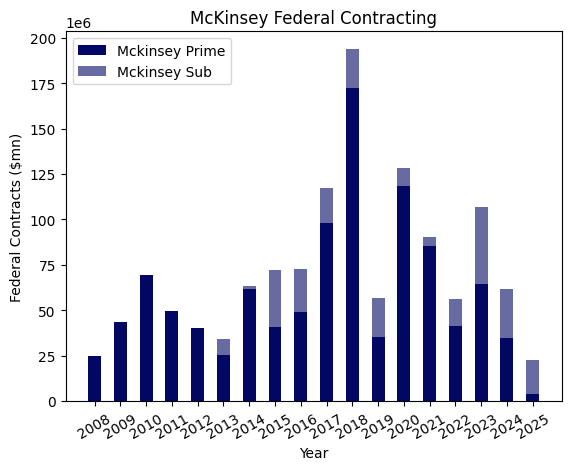

In [49]:
X = list(df_all_contracts_annual['Year'])
  
X_axis = np.arange(len(X)) 
  
plt.bar(X_axis, df_all_contracts_annual['McK Prime'], 0.5, label = 'Mckinsey Prime', color = 'xkcd:darkblue') 
plt.bar(X_axis, df_all_contracts_annual['McK Sub'], 0.5, bottom=df_all_contracts_annual['McK Prime'], label = 'Mckinsey Sub',color ='xkcd:darkblue',alpha=0.6) 

plt.ticklabel_format(axis='y', style='sci', scilimits=(6,6))
plt.xticks(X_axis, X,rotation=30) 
plt.xlabel("Year") 
plt.ylabel("Federal Contracts ($mn)") 
plt.title("McKinsey Federal Contracting") 
plt.legend(loc = 'upper left') 
plt.show() 

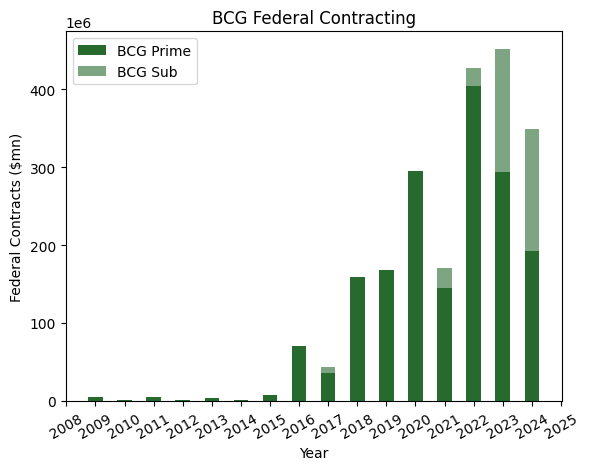

In [50]:
X = list(df_all_contracts_annual['Year'])
  
X_axis = np.arange(len(X)) 
  
plt.bar(X_axis, df_all_contracts_annual['BCG Prime'], 0.5, label = 'BCG Prime', color = '#266A2E') 
plt.bar(X_axis, df_all_contracts_annual['BCG Sub'], 0.5, bottom=df_all_contracts_annual['BCG Prime'], label = 'BCG Sub', color = '#266A2E',alpha=0.6) 

plt.ticklabel_format(axis='y', style='sci', scilimits=(6,6))
plt.xticks(X_axis, X,rotation=30) 
plt.xlabel("Year") 
plt.ylabel("Federal Contracts ($mn)") 
plt.title("BCG Federal Contracting") 
plt.legend(loc = 'upper left') 
plt.show() 

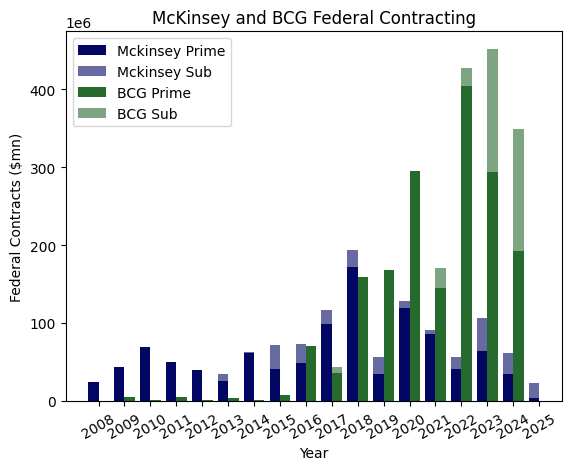

In [51]:
X = list(df_all_contracts_annual['Year'])
  
X_axis = np.arange(len(X)) 
  
plt.bar(X_axis - 0.2, df_all_contracts_annual['McK Prime'], 0.4, label = 'Mckinsey Prime', color = 'xkcd:darkblue') 
plt.bar(X_axis - 0.2, df_all_contracts_annual['McK Sub'], 0.4, bottom=df_all_contracts_annual['McK Prime'], label = 'Mckinsey Sub',color ='xkcd:darkblue',alpha=0.6) 
plt.bar(X_axis + 0.2, df_all_contracts_annual['BCG Prime'], 0.4, label = 'BCG Prime', color = '#266A2E') 
plt.bar(X_axis + 0.2, df_all_contracts_annual['BCG Sub'], 0.4, bottom=df_all_contracts_annual['BCG Prime'], label = 'BCG Sub', color = '#266A2E',alpha=0.6) 

plt.ticklabel_format(axis='y', style='sci', scilimits=(6,6))
plt.xticks(X_axis, X,rotation=30) 
plt.xlabel("Year") 
plt.ylabel("Federal Contracts ($mn)") 
plt.title("McKinsey and BCG Federal Contracting") 
plt.legend(loc = 'upper left') 
plt.show() 

## <ins>Prime Contract Analysis<ins>

### Below are slices that show all prime contracts for McKinsey and BCG that have end dates later than today, in other words these should represent all active contracts.

In [52]:
df_all_prime_data[df_all_prime_data['End Date'] > pd.to_datetime(date.today())][df_all_prime_data['Firm Name'] == 'McKinsey & Company']

C:\Users\wkarp\AppData\Local\Temp\ipykernel_49788\1777779730.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_all_prime_data[df_all_prime_data['End Date'] > pd.to_datetime(date.today())][df_all_prime_data['Firm Name'] == 'McKinsey & Company']


,internal_id,Award ID,Recipient Name,recipient_id,Start Date,End Date,Base Obligation Date,Award Amount,Total Outlays,Awarding Agency,...,Funding Agency,Funding Sub Agency,Place of Performance City Code,Place of Performance State Code,awarding_agency_id,agency_slug,generated_internal_id,Fed_FY_Helper,Fed_FY,Firm Name
8,149306415,W15QKN22C0038,"MCKINSEY & COMPANY, INC. WASHINGTON D.C.",186d18dd-1647-7baa-ec59-3788f853562d-C,2022-03-17,2025-01-19,2022-03-17,26030305,NaN,Department of Defense,...,Department of Defense,Department of the Army,None,DC,1173,department-of-defense,CONT_AWD_W15QKN22C0038_9700_-NONE-_-NONE-,2022,2022,McKinsey & Company
56,128934932,N0017819F8088,"MCKINSEY & COMPANY, INC. WASHINGTON D.C.",186d18dd-1647-7baa-ec59-3788f853562d-C,2019-01-02,2029-01-01,2019-01-02,500,NaN,Department of Defense,...,Department of Defense,Department of the Navy,None,DC,1173,department-of-defense,CONT_AWD_N0017819F8088_9700_N0017819D8088_9700,2019,2019,McKinsey & Company
188,171412626,FA942224C0001,"MCKINSEY & COMPANY, INC. WASHINGTON D.C.",186d18dd-1647-7baa-ec59-3788f853562d-C,2024-02-20,2025-03-03,2024-02-16,11183000,NaN,Department of Defense,...,Department of Defense,Department of the Air Force,None,DC,1173,department-of-defense,CONT_AWD_FA942224C0001_9700_-NONE-_-NONE-,2024,2024,McKinsey & Company
190,178357352,FA880224F0007,"MCKINSEY & COMPANY, INC. WASHINGTON D.C.",186d18dd-1647-7baa-ec59-3788f853562d-C,2024-09-30,2025-09-29,2024-09-30,7505155,NaN,Department of Defense,...,Department of Defense,Department of the Air Force,None,DC,1173,department-of-defense,CONT_AWD_FA880224F0007_9700_FA880224A0002_9700,2024,2024,McKinsey & Company
193,175497298,FA714624C0013,"MCKINSEY & COMPANY, INC. WASHINGTON D.C.",186d18dd-1647-7baa-ec59-3788f853562d-C,2024-07-02,2025-07-01,2024-07-02,3000000,NaN,Department of Defense,...,Department of Defense,Department of the Air Force,None,DC,1173,department-of-defense,CONT_AWD_FA714624C0013_9700_-NONE-_-NONE-,2024,2024,McKinsey & Company
194,167147573,FA714623C0038,"MCKINSEY & COMPANY, INC. WASHINGTON D.C.",186d18dd-1647-7baa-ec59-3788f853562d-C,2023-09-27,2025-09-26,2023-09-27,24955000,6050000,Department of Defense,...,Department of Defense,Department of the Air Force,None,VA,1173,department-of-defense,CONT_AWD_FA714623C0038_9700_-NONE-_-NONE-,2023,2023,McKinsey & Company
201,178179452,FA701424F0420,"MCKINSEY & COMPANY, INC. WASHINGTON D.C.",186d18dd-1647-7baa-ec59-3788f853562d-C,2024-09-30,2025-01-29,2024-09-26,1809524,NaN,Department of Defense,...,Department of Defense,Department of the Air Force,None,DC,1173,department-of-defense,CONT_AWD_FA701424F0420_9700_FA701420D0003_9700,2024,2024,McKinsey & Company
272,178462555,89243625FCD000013,"MCKINSEY & COMPANY, INC. WASHINGTON D.C.",186d18dd-1647-7baa-ec59-3788f853562d-C,2025-01-03,2025-12-31,2025-01-03,3878833,NaN,Department of Energy,...,Department of Energy,Department of Energy,None,DC,930,department-of-energy,CONT_AWD_89243625FCD000013_8900_47QRAA22D00E3_...,2025,2025,McKinsey & Company
273,175235733,86615124F00011,"MCKINSEY & COMPANY, INC. WASHINGTON D.C.",186d18dd-1647-7baa-ec59-3788f853562d-C,2024-09-30,2025-09-29,2024-09-23,895000,NaN,Department of Housing and Urban Development,...,Department of Housing and Urban Development,Department of Housing and Urban Development,None,DC,882,department-of-housing-and-urban-development,CONT_AWD_86615124F00011_8600_FA701420D0003_9700,2024,2024,McKinsey & Company
278,175438232,75FCMC24F0233,"MCKINSEY & COMPANY, INC. WASHINGTON D.C.",186d18dd-1647-7baa-ec59-3788f853562d-C,2024-09-27,2025-09-26,2024-09-27,4694679,NaN,Department of Health and Human Services,...,Department of Health and Human Services,Centers for Medicare and Medicaid Services,None,DC,806,department-of-health-and-human-services,CONT_AWD_75FCMC24F0233_7530_47QRAA22D00E3_4732,2024,2024,McKinsey & Company


In [53]:
df_all_prime_data[df_all_prime_data['End Date'] > pd.to_datetime(date.today())][df_all_prime_data['Firm Name'] == 'The Boston Consulting Group']

C:\Users\wkarp\AppData\Local\Temp\ipykernel_49788\3571931215.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_all_prime_data[df_all_prime_data['End Date'] > pd.to_datetime(date.today())][df_all_prime_data['Firm Name'] == 'The Boston Consulting Group']


,internal_id,Award ID,Recipient Name,recipient_id,Start Date,End Date,Base Obligation Date,Award Amount,Total Outlays,Awarding Agency,...,Funding Agency,Funding Sub Agency,Place of Performance City Code,Place of Performance State Code,awarding_agency_id,agency_slug,generated_internal_id,Fed_FY_Helper,Fed_FY,Firm Name
467,171656355,91990024F0019,THE BOSTON CONSULTING GROUP INC,84bcaf5a-0884-7b64-d021-df9f22ffef89-C,2024-06-01,2025-01-14,2024-05-24,1293679,911145,Department of Education,...,Department of Education,Department of Education,None,MA,1068,department-of-education,CONT_AWD_91990024F0019_9100_47QRAA21D00AU_4732,2024,2024,The Boston Consulting Group
497,163316323,72061523M00001,THE BOSTON CONSULTING GROUP INC,84bcaf5a-0884-7b64-d021-df9f22ffef89-C,2023-09-25,2025-02-16,2023-09-21,1293621,1293621,Agency for International Development,...,Agency for International Development,Agency for International Development,None,None,801,agency-for-international-development,CONT_AWD_72061523M00001_7200_47QRAA21D00AU_4732,2023,2023,The Boston Consulting Group
512,128934215,N0017819F7235,BCG FEDERAL CORP.,e0fc1ba7-7f61-1986-d36b-ac0ccc27e77a-C,2019-01-02,2029-01-01,2019-01-02,500,NaN,Department of Defense,...,Department of Defense,Department of the Navy,None,MD,1173,department-of-defense,CONT_AWD_N0017819F7235_9700_N0017819D7235_9700,2019,2019,The Boston Consulting Group
513,169913327,N0002424F24B1,BCG FEDERAL CORP.,e0fc1ba7-7f61-1986-d36b-ac0ccc27e77a-C,2023-12-22,2025-01-31,2023-12-22,58430380,NaN,Department of Defense,...,Department of Defense,Department of the Navy,None,DC,1173,department-of-defense,CONT_AWD_N0002424F24B1_9700_N0002420D2431_9700,2024,2024,The Boston Consulting Group
516,97579891,N0002420F24B1,BCG FEDERAL CORP.,e0fc1ba7-7f61-1986-d36b-ac0ccc27e77a-C,2020-02-25,2025-02-24,2020-02-25,3000,NaN,Department of Defense,...,Department of Defense,Department of the Navy,None,MD,1173,department-of-defense,CONT_AWD_N0002420F24B1_9700_N0002420D2431_9700,2020,2020,The Boston Consulting Group
519,175410298,HT003824F0015,BCG FEDERAL CORP.,e0fc1ba7-7f61-1986-d36b-ac0ccc27e77a-C,2024-07-01,2025-05-31,2024-06-28,107129925,NaN,Department of Defense,...,Department of Defense,Defense Health Agency,None,VA,1173,department-of-defense,CONT_AWD_HT003824F0015_9700_HT003822D0001_9700,2024,2024,The Boston Consulting Group
534,162819680,FA701423F0184,BCG FEDERAL CORP.,e0fc1ba7-7f61-1986-d36b-ac0ccc27e77a-C,2023-06-16,2025-06-15,2023-06-15,50440000,3746667,Department of Defense,...,Department of Defense,Department of the Navy,None,MD,1173,department-of-defense,CONT_AWD_FA701423F0184_9700_FA701420D0005_9700,2023,2023,The Boston Consulting Group
547,168342353,89233124FNA400589,BCG FEDERAL CORP.,e0fc1ba7-7f61-1986-d36b-ac0ccc27e77a-C,2024-02-08,2025-02-11,2024-02-08,500000,500000,Department of Energy,...,Department of Energy,Department of Energy,None,DC,930,department-of-energy,CONT_AWD_89233124FNA400589_8900_FA701420D0005_...,2024,2024,The Boston Consulting Group
549,159324932,24322623F0097,BCG FEDERAL CORP.,e0fc1ba7-7f61-1986-d36b-ac0ccc27e77a-C,2023-05-15,2025-05-14,2023-05-15,5000000,3850000,Office of Personnel Management,...,Office of Personnel Management,Office of Personnel Management,None,MD,503,office-of-personnel-management,CONT_AWD_24322623F0097_2400_FA701420D0005_9700,2023,2023,The Boston Consulting Group


### In order to see what contracts the firms have started in the last 6 months and 12 months. Below we create timestamp associated variables recent_months and recent_year that will help slice the most recent contracts for each firm.

In [54]:
recent_months = date.today()+pd.DateOffset(months = -6) 
recent_year = date.today()+pd.DateOffset(years = -1) 

### Recent work for McKinsey in the last 12 months and last 6 months.

In [55]:
df_all_prime_data[df_all_prime_data['Start Date'] > recent_year][df_all_prime_data['Firm Name'] == 'The Boston Consulting Group']

C:\Users\wkarp\AppData\Local\Temp\ipykernel_49788\2603730881.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_all_prime_data[df_all_prime_data['Start Date'] > recent_year][df_all_prime_data['Firm Name'] == 'The Boston Consulting Group']


,internal_id,Award ID,Recipient Name,recipient_id,Start Date,End Date,Base Obligation Date,Award Amount,Total Outlays,Awarding Agency,...,Funding Agency,Funding Sub Agency,Place of Performance City Code,Place of Performance State Code,awarding_agency_id,agency_slug,generated_internal_id,Fed_FY_Helper,Fed_FY,Firm Name
467,171656355,91990024F0019,THE BOSTON CONSULTING GROUP INC,84bcaf5a-0884-7b64-d021-df9f22ffef89-C,2024-06-01,2025-01-14,2024-05-24,1293679,911145,Department of Education,...,Department of Education,Department of Education,None,MA,1068,department-of-education,CONT_AWD_91990024F0019_9100_47QRAA21D00AU_4732,2024,2024,The Boston Consulting Group
468,172593550,77344424F0110,THE BOSTON CONSULTING GROUP INC,84bcaf5a-0884-7b64-d021-df9f22ffef89-C,2024-06-27,2024-08-26,2024-06-27,186000,186000,U.S. International Development Finance Corpora...,...,U.S. International Development Finance Corpora...,U.S. International Development Finance Corpora...,None,DC,1522,us-international-development-finance-corporation,CONT_AWD_77344424F0110_7700_77344424D0012_7700,2024,2024,The Boston Consulting Group
519,175410298,HT003824F0015,BCG FEDERAL CORP.,e0fc1ba7-7f61-1986-d36b-ac0ccc27e77a-C,2024-07-01,2025-05-31,2024-06-28,107129925,NaN,Department of Defense,...,Department of Defense,Defense Health Agency,None,VA,1173,department-of-defense,CONT_AWD_HT003824F0015_9700_HT003822D0001_9700,2024,2024,The Boston Consulting Group
520,172372145,HT003824F0010,BCG FEDERAL CORP.,e0fc1ba7-7f61-1986-d36b-ac0ccc27e77a-C,2024-03-21,2024-05-24,2024-03-21,1000000,NaN,Department of Defense,...,Department of Defense,Defense Health Agency,None,MD,1173,department-of-defense,CONT_AWD_HT003824F0010_9700_HT003822D0001_9700,2024,2024,The Boston Consulting Group
532,171806211,FA701424F0091,BCG FEDERAL CORP.,e0fc1ba7-7f61-1986-d36b-ac0ccc27e77a-C,2024-03-12,2024-05-11,2024-02-29,900000,NaN,Department of Defense,...,Department of Defense,Department of the Army,None,KY,1173,department-of-defense,CONT_AWD_FA701424F0091_9700_FA701420D0005_9700,2024,2024,The Boston Consulting Group
547,168342353,89233124FNA400589,BCG FEDERAL CORP.,e0fc1ba7-7f61-1986-d36b-ac0ccc27e77a-C,2024-02-08,2025-02-11,2024-02-08,500000,500000,Department of Energy,...,Department of Energy,Department of Energy,None,DC,930,department-of-energy,CONT_AWD_89233124FNA400589_8900_FA701420D0005_...,2024,2024,The Boston Consulting Group


In [56]:
df_all_prime_data[df_all_prime_data['Start Date'] > recent_months][df_all_prime_data['Firm Name'] == 'The Boston Consulting Group']

C:\Users\wkarp\AppData\Local\Temp\ipykernel_49788\2405511934.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_all_prime_data[df_all_prime_data['Start Date'] > recent_months][df_all_prime_data['Firm Name'] == 'The Boston Consulting Group']


,internal_id,Award ID,Recipient Name,recipient_id,Start Date,End Date,Base Obligation Date,Award Amount,Total Outlays,Awarding Agency,...,Funding Agency,Funding Sub Agency,Place of Performance City Code,Place of Performance State Code,awarding_agency_id,agency_slug,generated_internal_id,Fed_FY_Helper,Fed_FY,Firm Name


### Recent work for McKinsey in the last 12 months and last 6 months.

In [57]:
df_all_prime_data[df_all_prime_data['Start Date'] > recent_year][df_all_prime_data['Firm Name'] == 'McKinsey & Company']

C:\Users\wkarp\AppData\Local\Temp\ipykernel_49788\3097466681.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_all_prime_data[df_all_prime_data['Start Date'] > recent_year][df_all_prime_data['Firm Name'] == 'McKinsey & Company']


,internal_id,Award ID,Recipient Name,recipient_id,Start Date,End Date,Base Obligation Date,Award Amount,Total Outlays,Awarding Agency,...,Funding Agency,Funding Sub Agency,Place of Performance City Code,Place of Performance State Code,awarding_agency_id,agency_slug,generated_internal_id,Fed_FY_Helper,Fed_FY,Firm Name
188,171412626,FA942224C0001,"MCKINSEY & COMPANY, INC. WASHINGTON D.C.",186d18dd-1647-7baa-ec59-3788f853562d-C,2024-02-20,2025-03-03,2024-02-16,11183000,NaN,Department of Defense,...,Department of Defense,Department of the Air Force,None,DC,1173,department-of-defense,CONT_AWD_FA942224C0001_9700_-NONE-_-NONE-,2024,2024,McKinsey & Company
190,178357352,FA880224F0007,"MCKINSEY & COMPANY, INC. WASHINGTON D.C.",186d18dd-1647-7baa-ec59-3788f853562d-C,2024-09-30,2025-09-29,2024-09-30,7505155,NaN,Department of Defense,...,Department of Defense,Department of the Air Force,None,DC,1173,department-of-defense,CONT_AWD_FA880224F0007_9700_FA880224A0002_9700,2024,2024,McKinsey & Company
191,177689595,FA880224F0006,"MCKINSEY & COMPANY, INC. WASHINGTON D.C.",186d18dd-1647-7baa-ec59-3788f853562d-C,2024-09-11,2024-11-20,2024-09-11,2207304,NaN,Department of Defense,...,Department of Defense,Department of the Air Force,None,DC,1173,department-of-defense,CONT_AWD_FA880224F0006_9700_FA880224A0002_9700,2024,2024,McKinsey & Company
193,175497298,FA714624C0013,"MCKINSEY & COMPANY, INC. WASHINGTON D.C.",186d18dd-1647-7baa-ec59-3788f853562d-C,2024-07-02,2025-07-01,2024-07-02,3000000,NaN,Department of Defense,...,Department of Defense,Department of the Air Force,None,DC,1173,department-of-defense,CONT_AWD_FA714624C0013_9700_-NONE-_-NONE-,2024,2024,McKinsey & Company
201,178179452,FA701424F0420,"MCKINSEY & COMPANY, INC. WASHINGTON D.C.",186d18dd-1647-7baa-ec59-3788f853562d-C,2024-09-30,2025-01-29,2024-09-26,1809524,NaN,Department of Defense,...,Department of Defense,Department of the Air Force,None,DC,1173,department-of-defense,CONT_AWD_FA701424F0420_9700_FA701420D0003_9700,2024,2024,McKinsey & Company
272,178462555,89243625FCD000013,"MCKINSEY & COMPANY, INC. WASHINGTON D.C.",186d18dd-1647-7baa-ec59-3788f853562d-C,2025-01-03,2025-12-31,2025-01-03,3878833,NaN,Department of Energy,...,Department of Energy,Department of Energy,None,DC,930,department-of-energy,CONT_AWD_89243625FCD000013_8900_47QRAA22D00E3_...,2025,2025,McKinsey & Company
273,175235733,86615124F00011,"MCKINSEY & COMPANY, INC. WASHINGTON D.C.",186d18dd-1647-7baa-ec59-3788f853562d-C,2024-09-30,2025-09-29,2024-09-23,895000,NaN,Department of Housing and Urban Development,...,Department of Housing and Urban Development,Department of Housing and Urban Development,None,DC,882,department-of-housing-and-urban-development,CONT_AWD_86615124F00011_8600_FA701420D0003_9700,2024,2024,McKinsey & Company
274,170956885,80NSSC24PA942,"MCKINSEY & COMPANY, INC. WASHINGTON D.C.",186d18dd-1647-7baa-ec59-3788f853562d-C,2024-04-25,2024-06-28,2024-04-25,892446,892446,National Aeronautics and Space Administration,...,National Aeronautics and Space Administration,National Aeronautics and Space Administration,None,DC,862,national-aeronautics-and-space-administration,CONT_AWD_80NSSC24PA942_8000_-NONE-_-NONE-,2024,2024,McKinsey & Company
278,175438232,75FCMC24F0233,"MCKINSEY & COMPANY, INC. WASHINGTON D.C.",186d18dd-1647-7baa-ec59-3788f853562d-C,2024-09-27,2025-09-26,2024-09-27,4694679,NaN,Department of Health and Human Services,...,Department of Health and Human Services,Centers for Medicare and Medicaid Services,None,DC,806,department-of-health-and-human-services,CONT_AWD_75FCMC24F0233_7530_47QRAA22D00E3_4732,2024,2024,McKinsey & Company
313,171853476,2032H824F00088,"MCKINSEY & COMPANY, INC. WASHINGTON D.C.",186d18dd-1647-7baa-ec59-3788f853562d-C,2024-05-31,2025-03-02,2024-05-31,2351168,NaN,Department of the Treasury,...,Department of the Treasury,Internal Revenue Service,None,DC,456,department-of-the-treasury,CONT_AWD_2032H824F00088_2050_47QRAA22D00E3_4732,2024,2024,McKinsey & Company


In [58]:
df_all_prime_data[df_all_prime_data['Start Date'] > recent_months][df_all_prime_data['Firm Name'] == 'McKinsey & Company']

C:\Users\wkarp\AppData\Local\Temp\ipykernel_49788\3545941756.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_all_prime_data[df_all_prime_data['Start Date'] > recent_months][df_all_prime_data['Firm Name'] == 'McKinsey & Company']


,internal_id,Award ID,Recipient Name,recipient_id,Start Date,End Date,Base Obligation Date,Award Amount,Total Outlays,Awarding Agency,...,Funding Agency,Funding Sub Agency,Place of Performance City Code,Place of Performance State Code,awarding_agency_id,agency_slug,generated_internal_id,Fed_FY_Helper,Fed_FY,Firm Name
190,178357352,FA880224F0007,"MCKINSEY & COMPANY, INC. WASHINGTON D.C.",186d18dd-1647-7baa-ec59-3788f853562d-C,2024-09-30,2025-09-29,2024-09-30,7505155,NaN,Department of Defense,...,Department of Defense,Department of the Air Force,None,DC,1173,department-of-defense,CONT_AWD_FA880224F0007_9700_FA880224A0002_9700,2024,2024,McKinsey & Company
191,177689595,FA880224F0006,"MCKINSEY & COMPANY, INC. WASHINGTON D.C.",186d18dd-1647-7baa-ec59-3788f853562d-C,2024-09-11,2024-11-20,2024-09-11,2207304,NaN,Department of Defense,...,Department of Defense,Department of the Air Force,None,DC,1173,department-of-defense,CONT_AWD_FA880224F0006_9700_FA880224A0002_9700,2024,2024,McKinsey & Company
201,178179452,FA701424F0420,"MCKINSEY & COMPANY, INC. WASHINGTON D.C.",186d18dd-1647-7baa-ec59-3788f853562d-C,2024-09-30,2025-01-29,2024-09-26,1809524,NaN,Department of Defense,...,Department of Defense,Department of the Air Force,None,DC,1173,department-of-defense,CONT_AWD_FA701424F0420_9700_FA701420D0003_9700,2024,2024,McKinsey & Company
272,178462555,89243625FCD000013,"MCKINSEY & COMPANY, INC. WASHINGTON D.C.",186d18dd-1647-7baa-ec59-3788f853562d-C,2025-01-03,2025-12-31,2025-01-03,3878833,NaN,Department of Energy,...,Department of Energy,Department of Energy,None,DC,930,department-of-energy,CONT_AWD_89243625FCD000013_8900_47QRAA22D00E3_...,2025,2025,McKinsey & Company
273,175235733,86615124F00011,"MCKINSEY & COMPANY, INC. WASHINGTON D.C.",186d18dd-1647-7baa-ec59-3788f853562d-C,2024-09-30,2025-09-29,2024-09-23,895000,NaN,Department of Housing and Urban Development,...,Department of Housing and Urban Development,Department of Housing and Urban Development,None,DC,882,department-of-housing-and-urban-development,CONT_AWD_86615124F00011_8600_FA701420D0003_9700,2024,2024,McKinsey & Company
278,175438232,75FCMC24F0233,"MCKINSEY & COMPANY, INC. WASHINGTON D.C.",186d18dd-1647-7baa-ec59-3788f853562d-C,2024-09-27,2025-09-26,2024-09-27,4694679,NaN,Department of Health and Human Services,...,Department of Health and Human Services,Centers for Medicare and Medicaid Services,None,DC,806,department-of-health-and-human-services,CONT_AWD_75FCMC24F0233_7530_47QRAA22D00E3_4732,2024,2024,McKinsey & Company


### McKinsey recent work by sub agency.

In [59]:
df_all_prime_data[df_all_prime_data['Start Date'] > recent_year][df_all_prime_data['Firm Name'] == 'McKinsey & Company'].groupby(['Awarding Sub Agency'])['Award Amount'].sum().sort_values(ascending=False).reset_index(name ='Total Awards Amount')

C:\Users\wkarp\AppData\Local\Temp\ipykernel_49788\807481333.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_all_prime_data[df_all_prime_data['Start Date'] > recent_year][df_all_prime_data['Firm Name'] == 'McKinsey & Company'].groupby(['Awarding Sub Agency'])['Award Amount'].sum().sort_values(ascending=False).reset_index(name ='Total Awards Amount')


,Awarding Sub Agency,Total Awards Amount
0,Department of the Air Force,25704983
1,Centers for Medicare and Medicaid Services,4694679
2,Department of Energy,3878833
3,Internal Revenue Service,2351168
4,Department of Housing and Urban Development,895000
5,National Aeronautics and Space Administration,892446


### BCG recent work by sub agency.

In [60]:
df_all_prime_data[df_all_prime_data['Start Date'] > recent_year][df_all_prime_data['Firm Name'] == 'The Boston Consulting Group'].groupby(['Awarding Sub Agency'])['Award Amount'].sum().sort_values(ascending=False).reset_index(name ='Total Awards Amount')

C:\Users\wkarp\AppData\Local\Temp\ipykernel_49788\450060403.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_all_prime_data[df_all_prime_data['Start Date'] > recent_year][df_all_prime_data['Firm Name'] == 'The Boston Consulting Group'].groupby(['Awarding Sub Agency'])['Award Amount'].sum().sort_values(ascending=False).reset_index(name ='Total Awards Amount')


,Awarding Sub Agency,Total Awards Amount
0,Defense Health Agency,108129925
1,Department of Education,1293679
2,Department of the Air Force,900000
3,Department of Energy,500000
4,U.S. International Development Finance Corpora...,186000


### Below, we graph the results of this data.

In [61]:
df_mck_last12 = df_all_prime_data[df_all_prime_data['Start Date'] > recent_year][df_all_prime_data['Firm Name'] == 'McKinsey & Company'].groupby(['Awarding Sub Agency'])['Award Amount'].sum().sort_values(ascending=False).reset_index(name ='Total Awards Amount')

C:\Users\wkarp\AppData\Local\Temp\ipykernel_49788\1653647648.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_mck_last12 = df_all_prime_data[df_all_prime_data['Start Date'] > recent_year][df_all_prime_data['Firm Name'] == 'McKinsey & Company'].groupby(['Awarding Sub Agency'])['Award Amount'].sum().sort_values(ascending=False).reset_index(name ='Total Awards Amount')


In [62]:
df_bcg_last12 = df_all_prime_data[df_all_prime_data['Start Date'] > recent_year][df_all_prime_data['Firm Name'] == 'The Boston Consulting Group'].groupby(['Awarding Sub Agency'])['Award Amount'].sum().sort_values(ascending=False).reset_index(name ='Total Awards Amount')

C:\Users\wkarp\AppData\Local\Temp\ipykernel_49788\1612273389.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_bcg_last12 = df_all_prime_data[df_all_prime_data['Start Date'] > recent_year][df_all_prime_data['Firm Name'] == 'The Boston Consulting Group'].groupby(['Awarding Sub Agency'])['Award Amount'].sum().sort_values(ascending=False).reset_index(name ='Total Awards Amount')


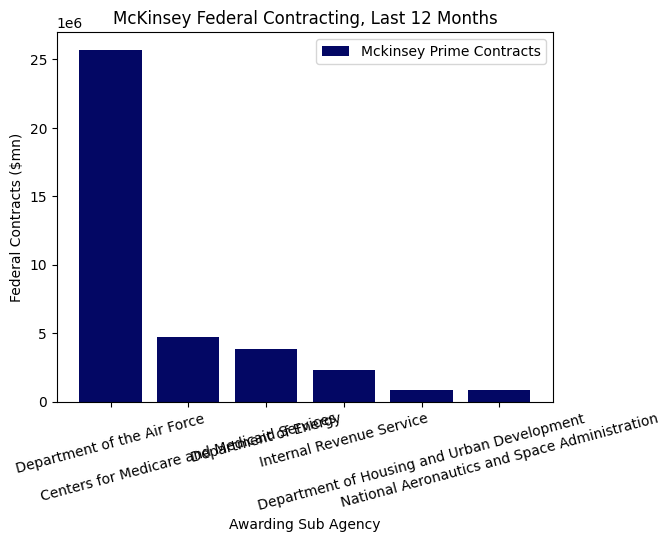

In [63]:
X = list(df_mck_last12['Awarding Sub Agency'])
  
X_axis = np.arange(len(X)) 
  
plt.bar(X_axis, df_mck_last12['Total Awards Amount'],  label = 'Mckinsey Prime Contracts', color = 'xkcd:darkblue') 

plt.ticklabel_format(axis='y', style='sci', scilimits=(6,6))
plt.xticks(X_axis, X,rotation=15) 
plt.xlabel("Awarding Sub Agency") 
plt.ylabel("Federal Contracts ($mn)") 
plt.title("McKinsey Federal Contracting, Last 12 Months") 
plt.legend(loc = 'upper right') 
plt.show() 

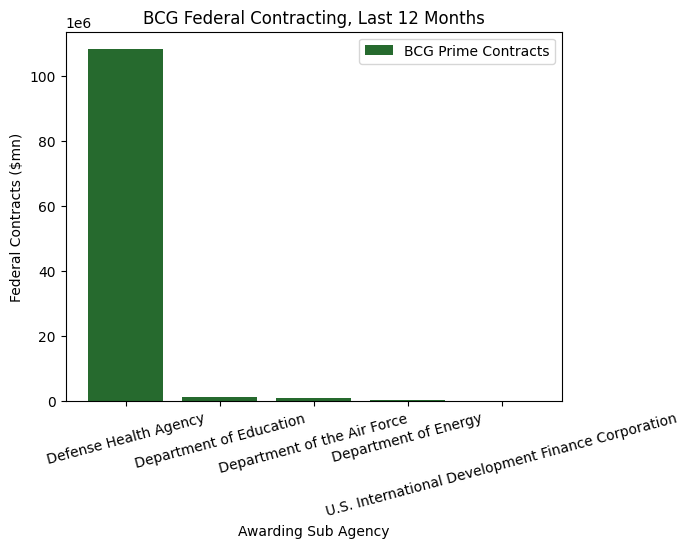

In [64]:
X = list(df_bcg_last12['Awarding Sub Agency'])
  
X_axis = np.arange(len(X)) 
  
plt.bar(X_axis, df_bcg_last12['Total Awards Amount'],  label = 'BCG Prime Contracts', color = '#266A2E') 

plt.ticklabel_format(axis='y', style='sci', scilimits=(6,6))
plt.xticks(X_axis, X,rotation=15) 
plt.xlabel("Awarding Sub Agency") 
plt.ylabel("Federal Contracts ($mn)") 
plt.title("BCG Federal Contracting, Last 12 Months") 
plt.legend(loc = 'upper right') 
plt.show() 

In [65]:
mck_last12_subagencies = df_bcg_last12['Awarding Sub Agency'].values.flatten().tolist()
print (mck_last12_subagencies)

['Defense Health Agency', 'Department of Education', 'Department of the Air Force', 'Department of Energy', 'U.S. International Development Finance Corporation']


## <ins>Sub Contract Analysis<ins>

### Below we summarize what other contractors hired McKinsey and BCG as subcontractors in the last 12 months.

In [66]:
df_all_sub_data[df_all_sub_data['Sub-Award Date'] > recent_year][df_all_sub_data['Firm Name'] == 'McKinsey & Company'].groupby(['Prime Recipient Name'])['Sub-Award Amount'].sum().sort_values(ascending=False).reset_index(name ='Total Awards Amount')

C:\Users\wkarp\AppData\Local\Temp\ipykernel_49788\3414220511.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_all_sub_data[df_all_sub_data['Sub-Award Date'] > recent_year][df_all_sub_data['Firm Name'] == 'McKinsey & Company'].groupby(['Prime Recipient Name'])['Sub-Award Amount'].sum().sort_values(ascending=False).reset_index(name ='Total Awards Amount')


,Prime Recipient Name,Total Awards Amount
0,THE MITRE CORPORATION,10503915
1,"CHEROKEE NATION SOLUTIONS LINK, L.L.C.",9550000
2,"CHEROKEE NATION FEDERAL CONSULTING, L.L.C.",8535000
3,"BRYCE SPACE AND TECHNOLOGY, LLC",5420150
4,"CACI TECHNOLOGIES, INC.",4540246
5,SCIENCE APPLICATIONS INTERNATIONAL CORPORATION,3025000
6,PERATON INC.,993000
7,"DAI GLOBAL, LLC",992530
8,INTERNATIONAL BUSINESS MACHINES CORPORATION,500000
9,NATIONAL ASSOCIATION OF STATE MENTAL HEALTH PR...,500000


In [67]:
df_mck_last12_c = df_all_sub_data[df_all_sub_data['Sub-Award Date'] > recent_year][df_all_sub_data['Firm Name'] == 'McKinsey & Company'].groupby(['Prime Recipient Name'])['Sub-Award Amount'].sum().sort_values(ascending=False).reset_index(name ='Total Awards Amount')

C:\Users\wkarp\AppData\Local\Temp\ipykernel_49788\1322457654.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_mck_last12_c = df_all_sub_data[df_all_sub_data['Sub-Award Date'] > recent_year][df_all_sub_data['Firm Name'] == 'McKinsey & Company'].groupby(['Prime Recipient Name'])['Sub-Award Amount'].sum().sort_values(ascending=False).reset_index(name ='Total Awards Amount')


In [68]:
df_all_sub_data[df_all_sub_data['Sub-Award Date'] > recent_year][df_all_sub_data['Firm Name'] == 'The Boston Consulting Group'].groupby(['Prime Recipient Name'])['Sub-Award Amount'].sum().sort_values(ascending=False).reset_index(name ='Total Awards Amount')

C:\Users\wkarp\AppData\Local\Temp\ipykernel_49788\3744255730.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_all_sub_data[df_all_sub_data['Sub-Award Date'] > recent_year][df_all_sub_data['Firm Name'] == 'The Boston Consulting Group'].groupby(['Prime Recipient Name'])['Sub-Award Amount'].sum().sort_values(ascending=False).reset_index(name ='Total Awards Amount')


,Prime Recipient Name,Total Awards Amount
0,HII MISSION TECHNOLOGIES CORP,56681631
1,"GOVCIO, LLC",50991379
2,BOOZ ALLEN HAMILTON INC.,17788000
3,"LEIDOS, INC.",14700036
4,"HII DEFENSE AND FEDERAL SOLUTIONS, INC.",13628636
5,HUNTINGTON INGALLS INCORPORATED,12832288
6,"KBR WYLE SERVICES, LLC",10100025
7,"ATLANTIC DIVING SUPPLY, INC.",7758000
8,"RADIANCE TECHNOLOGIES, INC.",2798804
9,"CACI, INC. - FEDERAL",2700020


### Below we graph the results of this data

In [69]:
bcg_last12_c = df_all_sub_data[df_all_sub_data['Sub-Award Date'] > recent_year][df_all_sub_data['Firm Name'] == 'The Boston Consulting Group'].groupby(['Prime Recipient Name'])['Sub-Award Amount'].sum().sort_values(ascending=False).reset_index(name ='Total Awards Amount')

C:\Users\wkarp\AppData\Local\Temp\ipykernel_49788\4195449579.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bcg_last12_c = df_all_sub_data[df_all_sub_data['Sub-Award Date'] > recent_year][df_all_sub_data['Firm Name'] == 'The Boston Consulting Group'].groupby(['Prime Recipient Name'])['Sub-Award Amount'].sum().sort_values(ascending=False).reset_index(name ='Total Awards Amount')


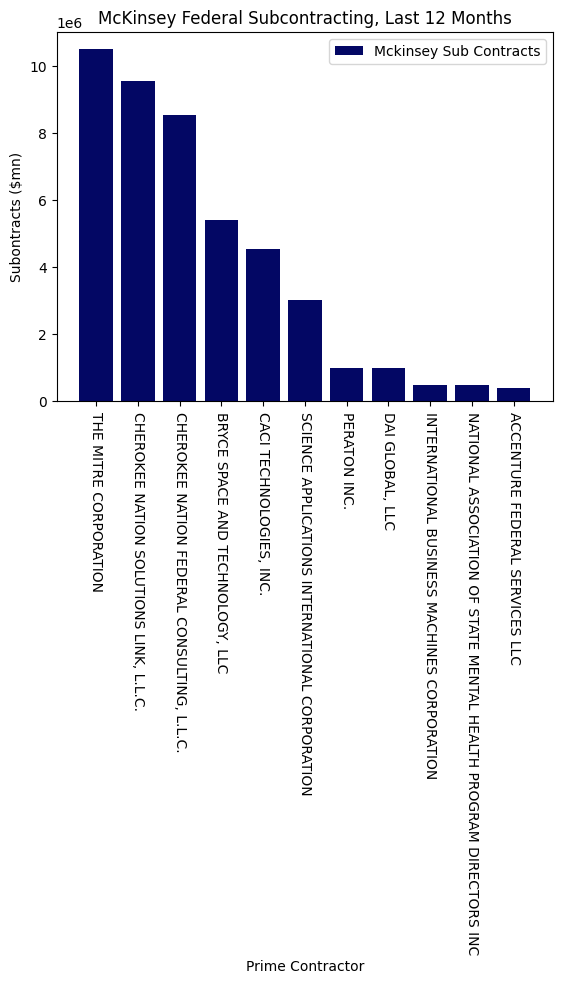

In [70]:
X = list(df_mck_last12_c['Prime Recipient Name'])
  
X_axis = np.arange(len(X)) 
  
plt.bar(X_axis, df_mck_last12_c['Total Awards Amount'],  label = 'Mckinsey Sub Contracts', color = 'xkcd:darkblue') 

plt.ticklabel_format(axis='y', style='sci', scilimits=(6,6))
plt.xticks(X_axis, X,rotation=270) 
plt.xlabel("Prime Contractor") 
plt.ylabel("Subontracts ($mn)") 
plt.title("McKinsey Federal Subcontracting, Last 12 Months") 
plt.legend(loc = 'upper right') 
plt.show() 

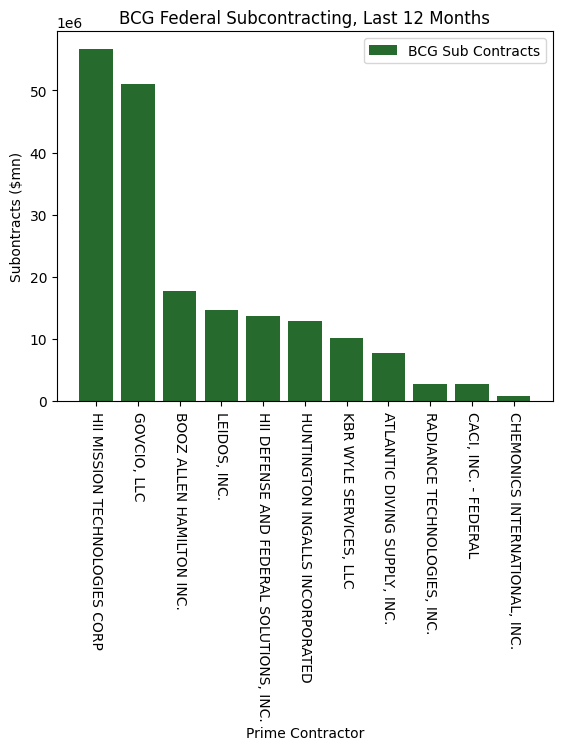

In [71]:
X = list(bcg_last12_c['Prime Recipient Name'])
  
X_axis = np.arange(len(X)) 
  
plt.bar(X_axis, bcg_last12_c['Total Awards Amount'],  label = 'BCG Sub Contracts', color = '#266A2E') 

plt.ticklabel_format(axis='y', style='sci', scilimits=(6,6))
plt.xticks(X_axis, X,rotation=270) 
plt.xlabel("Prime Contractor") 
plt.ylabel("Subontracts ($mn)") 
plt.title("BCG Federal Subcontracting, Last 12 Months") 
plt.legend(loc = 'upper right') 
plt.show() 